In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
train_data_dir = "../Datasets/catsanddogs_tensorflow/train/"
test_data_dir = "../Datasets/catsanddogs_tensorflow/validation/"

In [5]:
width, height = 150, 150
shape = (width, height, 3)
batch_size = 32
epochs = 10

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode="binary",
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode="binary",
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),
)

Epoch 1/10
63/63 [==============================] - 49s 773ms/step - loss: 0.7450 - accuracy: 0.5270 - val_loss: 0.6708 - val_accuracy: 0.6220
Epoch 2/10
63/63 [==============================] - 41s 649ms/step - loss: 0.6694 - accuracy: 0.6005 - val_loss: 0.6188 - val_accuracy: 0.6440
Epoch 3/10
63/63 [==============================] - 48s 764ms/step - loss: 0.6384 - accuracy: 0.6505 - val_loss: 0.6041 - val_accuracy: 0.6840
Epoch 4/10
63/63 [==============================] - 45s 711ms/step - loss: 0.6088 - accuracy: 0.6730 - val_loss: 0.5772 - val_accuracy: 0.7050
Epoch 5/10
63/63 [==============================] - 56s 886ms/step - loss: 0.5758 - accuracy: 0.6925 - val_loss: 0.5701 - val_accuracy: 0.7000
Epoch 6/10
63/63 [==============================] - 48s 756ms/step - loss: 0.5396 - accuracy: 0.7310 - val_loss: 0.5570 - val_accuracy: 0.7140
Epoch 7/10
63/63 [==============================] - 52s 823ms/step - loss: 0.5222 - accuracy: 0.7450 - val_loss: 0.5823 - val_accuracy: 0.6850

In [11]:
def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

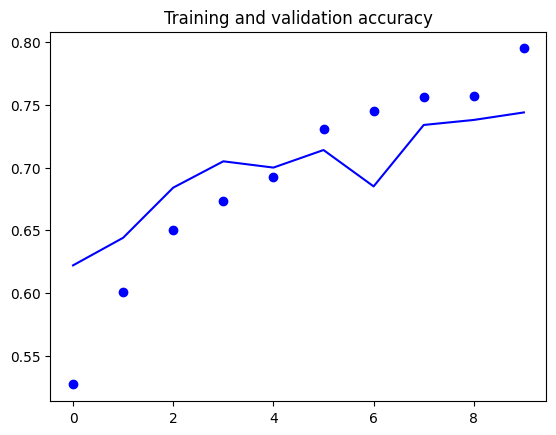

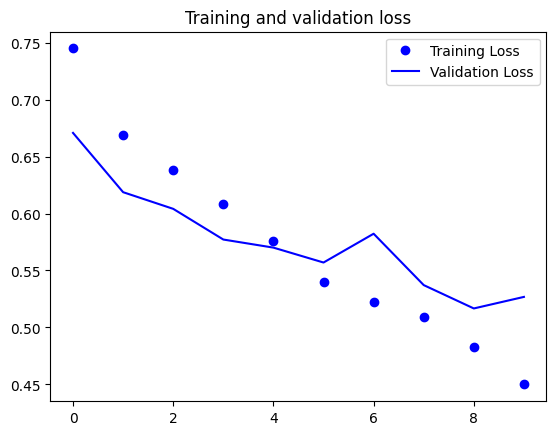

In [12]:
plot_loss_acc(history)

In [13]:
def preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)
    image = np.array(image) / 255.0 
    image = np.expand_dims(image, axis=0)
    return image

In [14]:
cat  ='/Users/sreetejadusi/Desktop/cat.jpg'
dog = '/Users/sreetejadusi/Desktop/dog.jpg'

In [15]:
image = preprocess_image(dog, (width, height))

In [16]:
model.predict(image)

1/1 [==============================] - 0s 114ms/step


array([[0.8853028]], dtype=float32)